# Example Solow model 


In this jupyter notebook we will specify, solve and analyse a simple Solow model in ModelFlow. 
    

In [28]:
#Required packages
import pandas as pd

# Modelflow modules
from modelclass import model
   
#for publication 
latex=0
model.widescreen()


## Specify the model 
We start by defining the logic of the Solow model in the Business Logic Language.   



:::{margin} **Business Logic Language**
More on how to specify models [here](../intro/model%20specification.ipynb)
:::

In [29]:
def labor_dif(growth,last):
    return growth*last

In [30]:
def answer(growth):
    return 42,34

In [47]:

fsolow2 = '''\
Income          = a  * Capital**alfa * Labor **(1-alfa) 
Consumption     = (1-saving_rate)  * Income 
Investment      = Income - Consumption   
diff(Capital)   = Investment-Depreciation_rate * Capital(-1)
diff(Labor)     = labor_dif(Labor_growth,Labor(-1))  
Capital_intensity = Capital/Labor 
ibh,b = answer(Labor_growth)
horse =  ibh *b 
'''

In [48]:

fsolow = '''\
Income          = a  * Capital**alfa * Labor **(1-alfa) 
Consumption     = (1-saving_rate)  * Income 
Investment      = Income - Consumption   
diff(Capital)   = Investment-Depreciation_rate * Capital(-1)
diff(Labor)     = Labor_growth * Labor(-1)  
Capital_intensity = Capital/Labor 
'''

## Create a model class instance

After defining the Business Logic Language and storing it in the variable 'fsolow', we create a class instance called msolow. 

In [49]:
msolow = model.from_eq(fsolow2,modelname='Solow model',funks=[labor_dif,answer])

In [50]:
print(msolow.equations)

FRML <> INCOME          = A  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATE)  * INCOME  $
FRML <> INVESTMENT      = INCOME - CONSUMPTION    $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATION_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_DIF(LABOR_GROWTH,LABOR(-1)))$
FRML <> CAPITAL_INTENSITY = CAPITAL/LABOR  $
FRML <> IBH,B = ANSWER(LABOR_GROWTH) $
FRML <> HORSE =  IBH *B  $


Above the equation for Capital and Labor on the left hand side of the = (equal to) consist of an expressing ```diff(Capital)``` and ```diff(Labor)```. **The equations are not normalized**. 

To solve a model in modelflow **all equations has to be normalized**. Meaning that the left hand side only consist of variables not expressions. So the function ```model.from_eq``` will normalize the equations as the first step before the model can be solved. 

In this case **first** ```diff(Capital)``` is transformed to $\Delta capital = capital-capital(-1)$. **Then** the lagged variables is moved to the right side of the =. 
 The same goes for diff(labor).
 
So the normalized business language of the model now looks like:

In [51]:
msolow.print_model

FRML <> INCOME          = A  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATE)  * INCOME  $
FRML <> INVESTMENT      = INCOME - CONSUMPTION    $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATION_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_DIF(LABOR_GROWTH,LABOR(-1)))$
FRML <> CAPITAL_INTENSITY = CAPITAL/LABOR  $
FRML <> IBH,B = ANSWER(LABOR_GROWTH) $
FRML <> HORSE =  IBH *B  $


## Create some data 

To show what Modelflow can do, we create a Pandas dataframe with input data. And print the first 5 out of 300 observations.  

In [52]:
N = 300  
df = pd.DataFrame({'LABOR':[100]*N,
                   'CAPITAL':[100]*N, 
                   'ALFA':[0.5]*N, 
                   'A': [1]*N, 
                   'DEPRECIATION_RATE': [0.05]*N, 
                   'LABOR_GROWTH': [0.01]*N, 
                   'SAVING_RATE':[0.05]*N})
df.head(2) #this prints out the first 5 rows of the dataframe

,LABOR,CAPITAL,ALFA,A,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE
0,100,100,0.5,1,0.05,0.01,0.05
1,100,100,0.5,1,0.05,0.01,0.05


## Run the model 

In [53]:
result = msolow(df,keep='Baseline') # The model is simulated for all years possible 
result.head(29)

,LABOR,CAPITAL,ALFA,A,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE,INCOME,B,CAPITAL_INTENSITY,CONSUMPTION,IBH,INVESTMENT,HORSE
0,100.000000,100.000000,0.5,1.0,0.05,0.01,0.05,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,101.000000,100.025580,0.5,1.0,0.05,0.01,0.05,100.511609,34.0,0.990352,95.486029,42.0,5.025580,1428.0
2,102.010000,100.076226,0.5,1.0,0.05,0.01,0.05,101.038487,34.0,0.981043,95.986562,42.0,5.051924,1428.0
3,103.030100,100.151443,0.5,1.0,0.05,0.01,0.05,101.580575,34.0,0.972060,96.501546,42.0,5.079029,1428.0
4,104.060401,100.250762,0.5,1.0,0.05,0.01,0.05,102.137821,34.0,0.963390,97.030930,42.0,5.106891,1428.0
5,105.101005,100.373733,0.5,1.0,0.05,0.01,0.05,102.710176,34.0,0.955022,97.574667,42.0,5.135509,1428.0
6,106.152015,100.519926,0.5,1.0,0.05,0.01,0.05,103.297593,34.0,0.946943,98.132713,42.0,5.164880,1428.0
7,107.213535,100.688931,0.5,1.0,0.05,0.01,0.05,103.900030,34.0,0.939144,98.705029,42.0,5.195002,1428.0
8,108.285671,100.880357,0.5,1.0,0.05,0.01,0.05,104.517449,34.0,0.931613,99.291576,42.0,5.225872,1428.0
9,109.368527,101.093830,0.5,1.0,0.05,0.01,0.05,105.149813,34.0,0.924341,99.892323,42.0,5.257491,1428.0


## Create a scenario and run again 

:::{margin} **dataframe.upd**
When importing modelclass all pandas dataframes are enriched with a a handy way to create a new pandas dataframe with updated series. 

In this case df.upd will create a a new dataframe with updated LABOR_GROWTH 

For additional explanation look [here](../../howto/update/model%20update.ipynb)
:::

In [54]:
dfscenario = df.upd('LABOR_GROWTH + 0.002')  # create a new dataframe, increase LABOR_GROWTH by 0.002
scenario   = msolow(dfscenario,keep='Higher labor growth ') # simulate the model 

## Now the results are also embedded in msolow.  


 - ```.basedf``` contains the first run of the model 
 - ```.lastdf``` contains the last run of the model 
 
 Also in this case the keyword ```keep``` is used. This causes the results to be  stored in a dictionary ```msolow.keep_solutions```. This can be useful when comparing several scenarios. 
 

## Inspect results  

### Using the [ ] operator 

We can select the variables of interest with wildcards. This will operate the results stored in ```basedf``` and ```.lastdf```

#### Look at variables starting with a C 

In [55]:
msolow['#ENDO']

#### Look at all endogenous variables

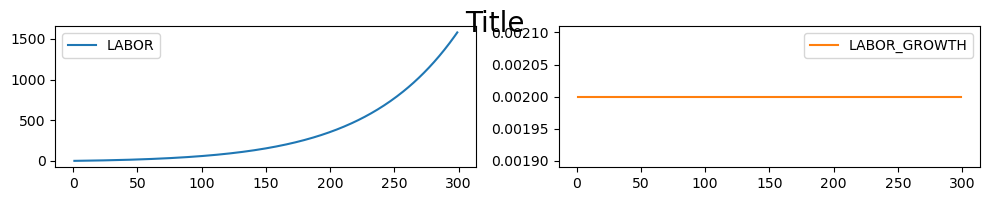

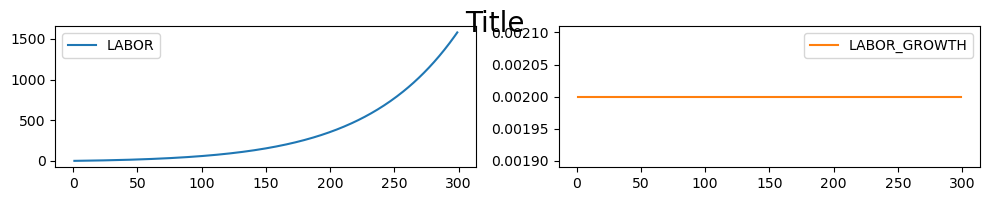

In [56]:
msolow['labor*'].dif.plot() 

### Using the keept solutions 
As mentioned above, because the keyword ```keep``` was used. The results are also stored in a dictionary. These data can 
also be used for charting. 

The reason for placing the results in a dictionary is to enable comparison of many scenarios, not just the first and the last. 

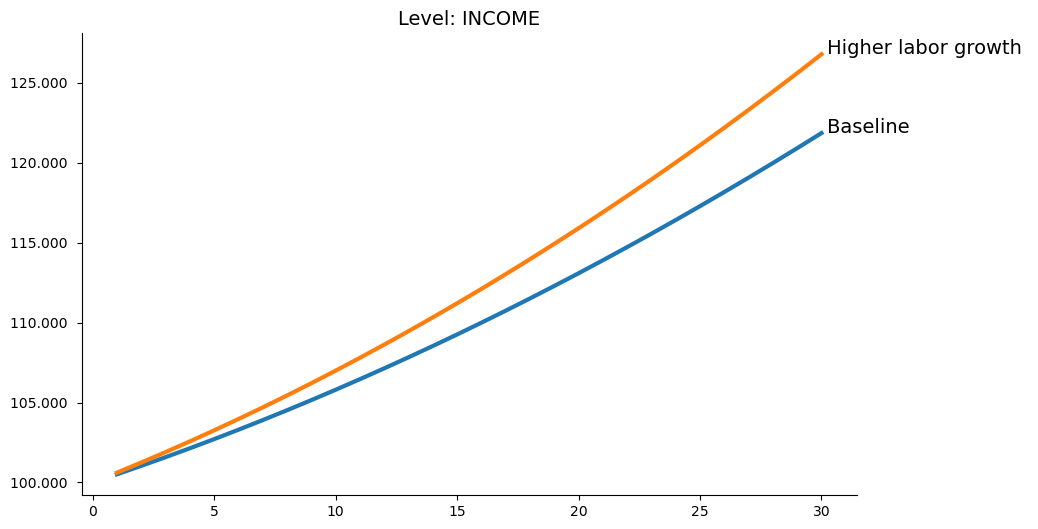

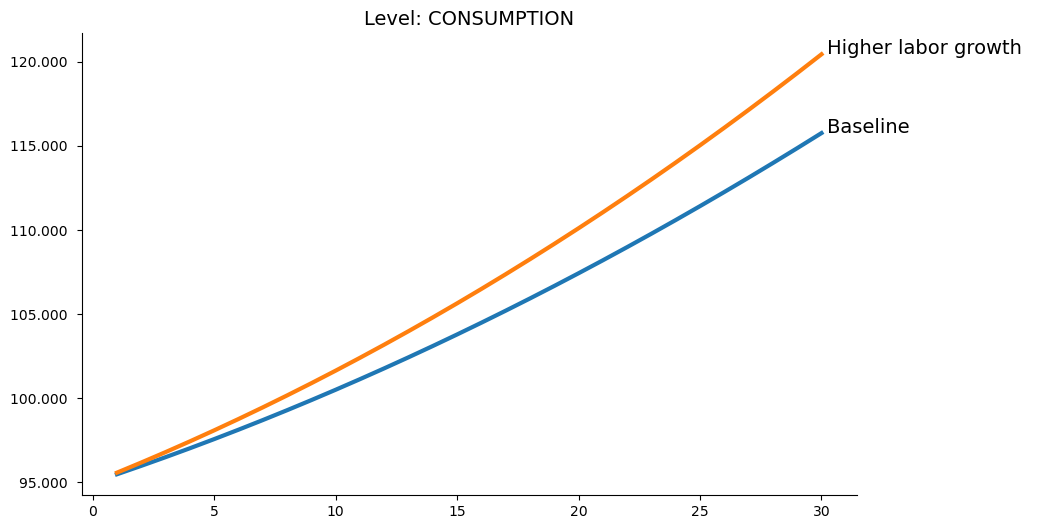

In [57]:
with msolow.set_smpl(1,30):
    msolow.keep_plot('income con*' ); 

In [58]:
msolow.modeldash('INCOME',jupyter=1)


apprun
No Dash, str(e)


## More advanced topics

### The logical stucture 
Now the model has been analyzed, and the structure can be displayed.

You will find more on the logical structure [here](../../howto/structure/Logical_structure.ipynb)

#### Model structure

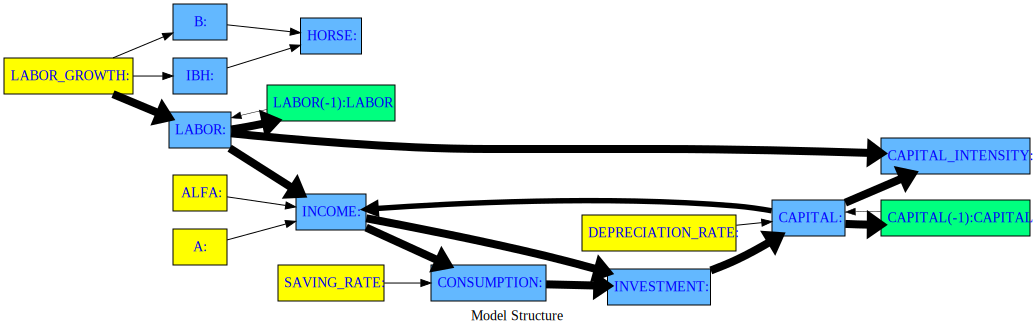

In [59]:
msolow.drawmodel( title="Model Structure", png=latex,size=(15,15))

#### Adjacency matrix

Another way to illustrate the dependency graph is an adjacency matrix. 

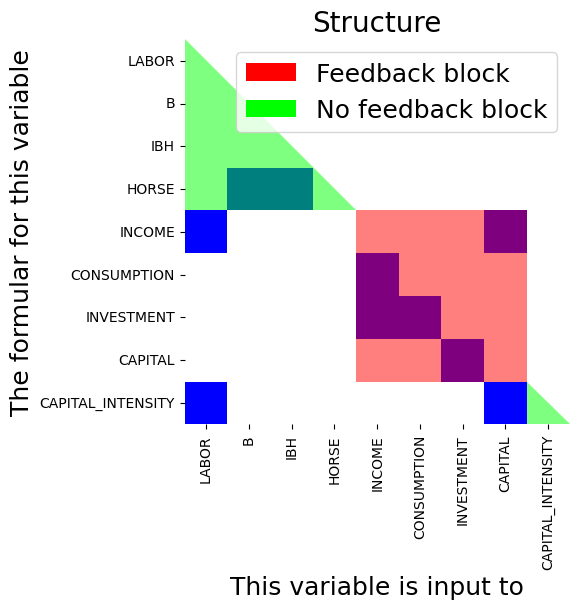

In [60]:
msolow.plotadjacency();

The variables  ['INVESTMENT', 'CONSUMPTION', 'CAPITAL', 'INCOME'] in the red area are the core of the model and has to be solved as a system. 

LABOR is the prolog and can be calculated before the core is solved. While CAPITAL_INTENSE is the epilog which can be calculated after the core is solved. 

Many models comform to this pattern. And for solving purpose a model is divided into a prolog, core and an epilog. Even if the core is actually consistent of several strong components. 

(solow-python-code)=
### The python function used to solve the model
In order to solve the model Modelflow will generate a python function which implements the model. The user will hopeful  newer have to relate to the generated python code. **The point of modelflow is, that the user has to relate to the specification of the business logic, not the implementation in code**  

In [61]:
print(msolow.make_los_text)

def make_los(funks=[],errorfunk=None):
    import time
    import tqdm
    from numba import jit
    from modeluserfunk import jit, recode
    from modelBLfunk import array, classfunk, clognorm, exp, gamma, inspect, jit, lifetime_credit_loss, log, logit, logit_inverse, lognorm, matrix, mv_opt, mv_opt_prop, norm, normcdf, qgamma, sqrt, sum_excel, transpose
    labor_dif = funks[0]
    answer = funks[1]
    def prolog0(values,outvalues,row,alfa=1.0):
        try :
            pass
            values[row,0]=values[row-1,0]+(labor_dif(values[row,5],values[row-1,0]))
            pass  # B
            values[row,11],values[row,8]=answer(values[row,5])
            values[row,13]=values[row,11]*values[row,8]
        except :
            errorfunk(values,sys.exc_info()[2].tb_lineno,overhead=11,overeq=0)
            raise
        return 
    def prolog(values,outvalues,row,alfa=1.0):
        prolog0(values,outvalues,row,alfa=alfa)
        return  
    def core0(values,outvalues,row,alfa=1.0):
  